In [1]:
print("all ok")

all ok


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df=pd.read_csv(r"../../Datasets/placement_linear.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package in Lakh')

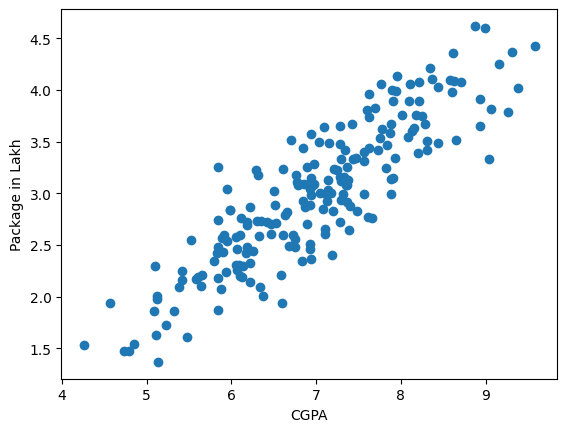

In [81]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package in Lakh")

In [82]:
x=df.iloc[:,0]
y=df.iloc[:,1]

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=27)

In [84]:
y_train

156    3.13
124    2.31
65     3.81
87     3.55
169    4.37
       ... 
56     2.74
31     3.89
72     3.62
184    3.14
19     2.83
Name: package, Length: 160, dtype: float64

In [85]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [86]:
lr.fit(x_train.values.reshape(-1, 1),y_train.values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
y_pred=lr.predict(x_test.values.reshape(-1,1))

In [88]:
y_pred

array([3.0235988 , 3.92183708, 4.34821602, 3.31922152, 2.60290492,
       2.90989775, 2.15947083, 3.43292257, 2.83030701, 2.85304722,
       3.10318953, 3.11455964, 4.09807371, 3.31353647, 2.76208639,
       2.94969312, 3.73991541, 3.68306488, 3.05770911, 2.78482659,
       2.63701523, 4.22314486, 3.06907922, 2.09693525, 3.31353647,
       2.3300224 , 2.33570745, 2.37550282, 3.5011432 , 3.34196173,
       2.53468429, 4.05827834, 3.18278027, 3.16004006, 2.23337651,
       3.70580509, 2.96106322, 3.91615203, 3.76265562, 3.63758446])

Text(0, 0.5, 'Package in Lakh')

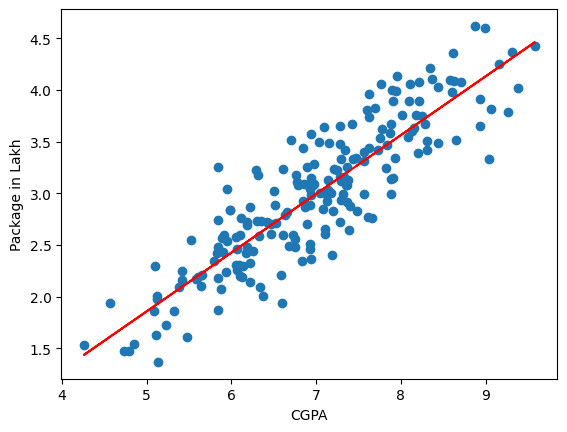

In [89]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train.values.reshape(-1,1)),color='red')
plt.xlabel("CGPA")
plt.ylabel("Package in Lakh")

In [90]:
m=lr.coef_
m

array([0.56850524])

In [91]:
b=lr.intercept_
b

np.float64(-0.9843631749885526)

In [92]:
x_test.iloc[0]

np.float64(7.05)

In [93]:
x_test.iloc[1]

np.float64(8.63)

In [94]:
y_test.iloc[1]

np.float64(4.09)

In [95]:
lr.predict(x_test.iloc[1].reshape(-1,1))

array([3.92183708])

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,root_mean_squared_error

In [97]:
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  0.27740902540761575


In [98]:
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  0.12543757942956626


In [99]:
print("RMSE: ",root_mean_squared_error(y_test,y_pred))

RMSE:  0.35417168072781635


In [100]:
print("R2 score:",r2_score(y_test,y_pred))

R2 score: 0.7309557444768802


In [101]:
r2=r2_score(y_test,y_pred)

In [102]:
print("Adjusted R2:", (1-((1-r2) * (len(y_test)-1))/(len(y_test)-1-1)))  # adjusted r2 score

Adjusted R2: 0.7238756324894297


In [103]:
import random

In [123]:
new_df=df.copy()
new_df['new_feature']=np.random.random(200)

In [124]:
new_df.head()

,cgpa,package,new_feature
0,6.89,3.26,0.813868
1,5.12,1.98,0.303686
2,7.82,3.25,0.371347
3,7.42,3.67,0.002070
4,6.94,3.57,0.167652


In [125]:
x=new_df[['cgpa','new_feature']]
y=new_df['package']

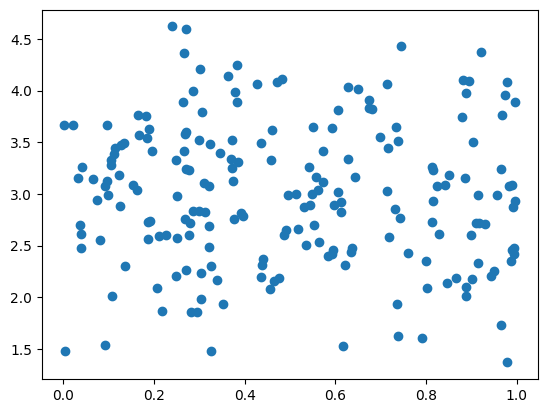

In [126]:
plt.scatter(new_df["new_feature"],new_df["package"])

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [128]:
x_train.head()

,cgpa,new_feature
137,7.14,0.097338
163,8.93,0.674650
111,5.42,0.950392
123,5.10,0.326629
109,7.77,0.713446


In [129]:
lr=LinearRegression()

In [130]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [131]:
y_pred=lr.predict(x_test)

In [132]:
r2=r2_score(y_test,y_pred)
print("R2 score:",r2)

R2 score: 0.7858959408804077


In [134]:
print("Adjusted R2:", (1-((1-r2) * (40-1))/(40-1-2))) 

Adjusted R2: 0.7743227484955649


In [135]:
new_df2=df.copy()
new_df2["iq"]= new_df['package'] + (np.random.randint(-12,12,200)/10)
new_df2.head()

,cgpa,package,iq
0,6.89,3.26,3.36
1,5.12,1.98,1.38
2,7.82,3.25,3.35
3,7.42,3.67,3.27
4,6.94,3.57,3.37


In [136]:
x=new_df2[['cgpa','iq']]
y=new_df2['package']

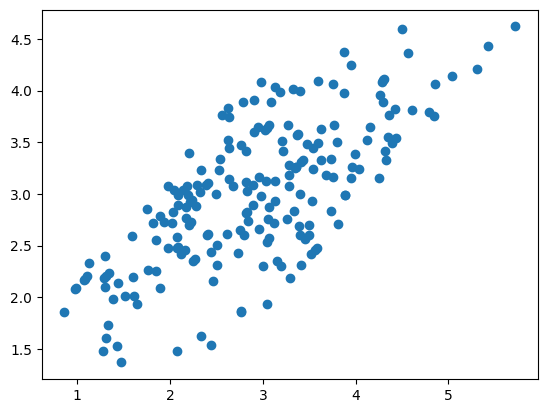

In [137]:
plt.scatter(new_df2["iq"],new_df2["package"])

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [139]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [140]:
r2=r2_score(y_test,y_pred)
print("R2 score:",r2)

R2 score: 0.8673830914203255


In [141]:
print("Adjusted R2:", (1-((1-r2) * (len(y_test)-1))/(len(y_test)-1-2))) 

Adjusted R2: 0.8602146098754783
